In [29]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
CityData = pd.read_csv(city_data_to_load)
RideData = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
#print(CityData.head(2))
#print(RideData.head(2))

pyber_data = RideData.merge(CityData,on='city',how='outer')
# Display the data table for preview

no_dup_RideData = RideData.drop_duplicates('city')
no_dup_consolidated_data = no_dup_RideData.merge(CityData,on='city',how='outer')
no_dup_consolidated_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [30]:
#create seperate data frames based on each city types 
urban_city = pyber_data.loc[(pyber_data["type"]== "Urban")]
rural_city = pyber_data.loc[(pyber_data["type"]== "Rural")]
suburban_city = pyber_data.loc[(pyber_data["type"]== "Suburban")]

In [31]:
#total_rides = pyber_data['ride_id'].count()
#average_fare = pyber_data['fare'].mean()
#df_pyber = pd.DataFrame({"Average": average_fare, "TotalRides":total_rides})
#calculate per city type
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
ttl_ride_urban_city = urban_city.groupby(['city']).count()['ride_id']
ttl_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()


avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
ttl_ride_rural_city = rural_city.groupby(['city']).count()['ride_id']
ttl_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
ttl_ride_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
ttl_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()
ttl_drivers_suburban_city

city                driver_count
Barronchester       11              16
Bethanyland         22              18
Brandonfort         10              19
Colemanland         23              22
Davidfurt           23              17
East Aaronbury      7                9
East Danielview     22              17
East Kentstad       20              13
East Marymouth      5               27
Grayville           2               15
Josephside          25              27
Lake Ann            3               12
Lake Omar           22              14
Lake Robertside     4               25
Lake Scott          23              18
Lewishaven          23              12
Lewisland           4               17
Mezachester         14              17
Myersshire          19              16
New Olivia          20              17
New Raymond         17              22
New Shannonberg     20              17
Nicolechester       19              19
North Jeffrey       11              13
North Richardhaven  1          

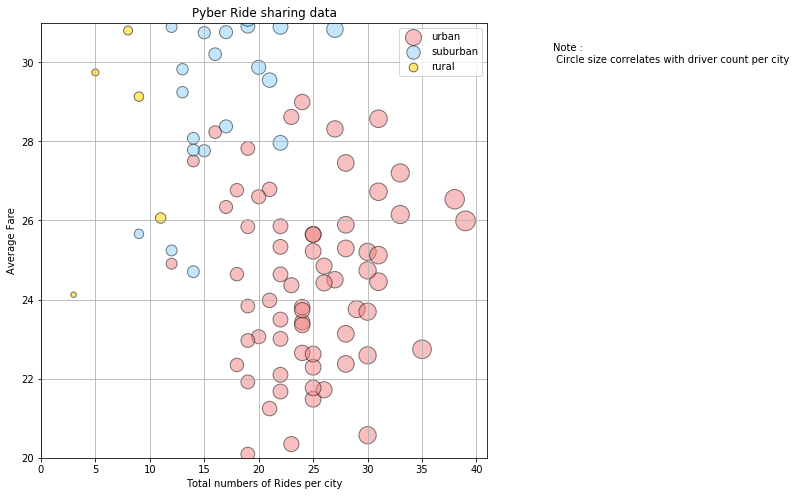

In [32]:
fig, ax= plt.subplots(figsize=(8,8))
ax.set_xlim(0,max(ttl_ride_urban_city)+2)
ax.set_ylim(20,max(avg_fare_urban_city)+2)

plt.scatter(ttl_ride_urban_city,avg_fare_urban_city,s=ttl_drivers_urban_city*10,
            marker='o',facecolors="lightcoral",edgecolor='black', alpha=0.5,label="urban",linewidth=1)
plt.scatter(ttl_ride_suburban_city,avg_fare_suburban_city,s=ttl_drivers_suburban_city*10,
            marker='o',facecolors="lightskyblue",edgecolor='black', alpha=0.5,label="suburban",linewidth=1)
plt.scatter(ttl_ride_rural_city,avg_fare_rural_city,s=ttl_drivers_rural_city*10,
            marker='o',facecolors="gold",edgecolor='black', alpha=0.55,label="rural",linewidth=1)


plt.title("Pyber Ride sharing data")
plt.xlabel("Total numbers of Rides per city")
plt.ylabel("Average Fare")
plt.legend(loc='upper right')
plt.text(47,30,'Note : \n Circle size correlates with driver count per city')
plt.savefig('../Images/scatterplot.png', dpi=300)
plt.grid()
plt.show()


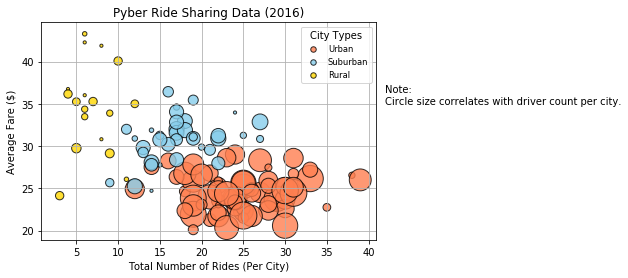

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


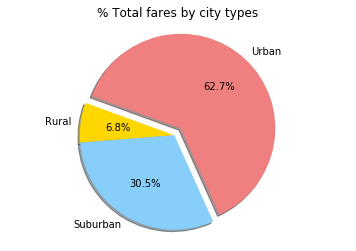

In [33]:
total_fare= pyber_data.groupby(['type'])['fare'].sum()
labels=["Rural", "Suburban","Urban"]
color=["gold", "lightskyblue", "lightcoral"]
explode=(0,0,0.1)
plt.title("% Total fares by city types")
plt.pie(total_fare, explode=explode,labels=labels,colors=color,autopct="%1.1f%%", shadow=True,startangle=160)
plt.axis("equal")
plt.savefig('../Images/city.png', dpi=300)
plt.show()

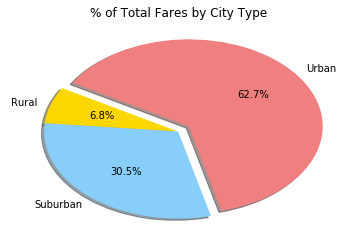

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


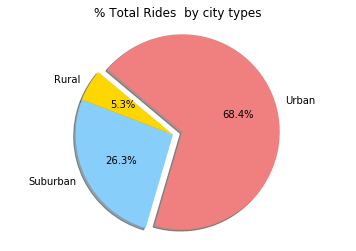

In [34]:
total_rides = pyber_data.groupby(['type'])['ride_id'].count()
labels=["Rural", "Suburban","Urban"]
color=["gold", "lightskyblue", "lightcoral"]
explode=(0,0,0.1)
plt.title("% Total Rides  by city types")
plt.pie(total_rides, explode=explode,labels=labels,colors=color,autopct="%1.1f%%", shadow=True,startangle=140)
plt.axis("equal")
plt.savefig('../Images/Rides.png', dpi=300)
plt.show()

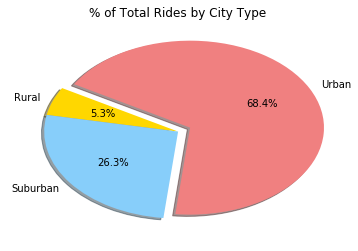

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


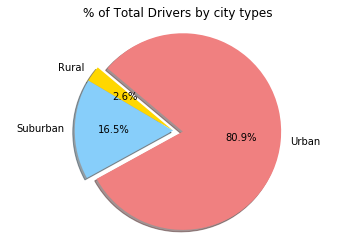

In [35]:
total_drivers = CityData.groupby(['type'])['driver_count'].sum()
labels=["Rural", "Suburban","Urban"]
color=["gold", "lightskyblue", "lightcoral"]
explode=(0,0,0.1)
plt.title("% of Total Drivers by city types")
plt.pie(total_drivers, explode=explode,labels=labels,colors=color,autopct="%1.1f%%", shadow=True,startangle=140)
plt.axis("equal")
plt.savefig('../Images/drive.png', dpi=300)

plt.show()

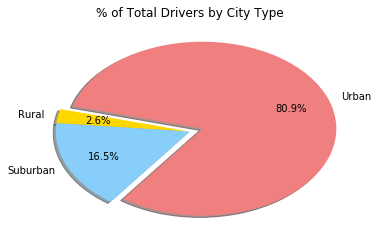

In [6]:
# Show Figure
plt.show()